# DSP2 - Lab 02


## Abstract
The tasks of this upcoming lab concern the generation and application of a Notch Filter. Additionally, a moving average/median filter is implemented.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

## Lab Experiment 1: Notch Filter

Describe the meaning of the Quality factor (Q factor) towards filters. Name the definition of the Q factor.

Q: Quality factor
Q = w_0/dw
Quality Factor = wished filter frequency / filter bandwidth

A higher bandwidth means that more frequencies are filtered out and that the Quality Factor is lower.

dw: bandwidth
dw = w_0/Q

Illustrate the discrete transfer function of a notch filter.

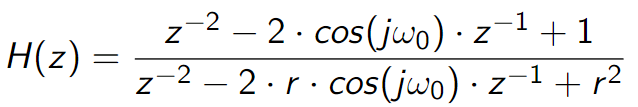

Create a discrete notch filter based on the following parameters:
- Notch frequency f0 = 1kHz
- Sampling frequency fs = 10kHz
- Quality factor Q = 20

In [2]:
def pzmap(G, ax=None, marker_color = None):
    
    if marker_color:
        marker_color = [marker_color, marker_color]
    else:
        marker_color = ["r", "b"]
            
    
    if ax:
        actual_imag_min, actual_imag_max = ax.get_ylim()
        actual_real_min, actual_real_max = ax.get_xlim()
    else:
        _, ax = plt.subplots(figsize=(5, 5))
    
    if ax.lines == []:
        # circle
        theta = np.linspace(-np.pi, np.pi, 201)
        ax.plot(np.sin(theta), np.cos(theta), color = 'k', linewidth=0.5)
        ax.axhline(y=0, color='k', alpha=0.3)
        ax.axvline(x=0, color='k', alpha=0.3) 
        actual_imag_min, actual_imag_max = -1.0, 1.0
        actual_real_min, actual_real_max = -1.0, 1.0
       
    # poles
    ax.plot(np.real(G.poles), np.imag(G.poles), 'X%s' % marker_color[0], label = 'Poles')

    # zeros
    ax.plot(np.real(G.zeros), np.imag(G.zeros), '.%s' % marker_color[1], label = 'Zeros')
    
    def make_one_long(a, b, c):
        a = np.array(a)
        gesamt = np.append(a, b)
        return np.append(gesamt, c)

    imag_min = np.min(make_one_long([actual_imag_min], np.imag(G.poles), np.imag(G.zeros))) * 1.05
    imag_max = np.max(make_one_long([actual_imag_max], np.imag(G.poles), np.imag(G.zeros))) * 1.05
    real_min = np.min(make_one_long([actual_real_min], np.real(G.poles), np.real(G.zeros))) * 1.05
    real_max = np.max(make_one_long([actual_real_max], np.real(G.poles), np.real(G.zeros))) * 1.05
    all_lim = np.max([np.abs(real_min), real_max, np.abs(imag_min), imag_max])
    ax.set_xlim(-all_lim, all_lim)
    ax.set_ylim(-all_lim, all_lim) 
        
    ax.legend(loc=1)
    ax.grid()
    return ax

In [16]:
# YOUR CODE HERE
f0 = 1000

# sampling frequency
fs = 10000
dt = 1 / fs

# normalized cutoff frequency
w0 = 2 * np.pi * f0 / fs

# Quality factor
Q = 20

# bandwidth of poles 
dw = (w0 / Q)

# pointer length from source to pole 
r = 1 - (dw/2)

# filter coeffs
b,a = signal.iirnotch(f0, Q, fs)

# Transfer function of a notch filter
notch_filter = signal.TransferFunction(b, a, dt=dt)

Plot the resulting notch filter using magnitude, phase response, impulse response, step response and pole-zero plot.

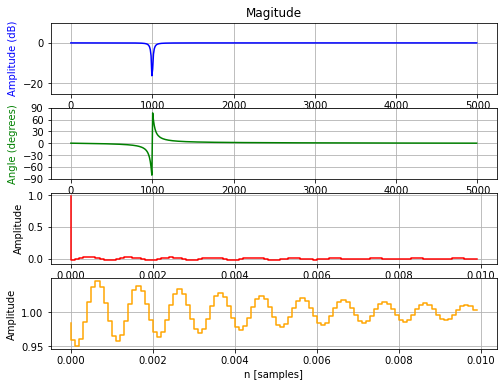

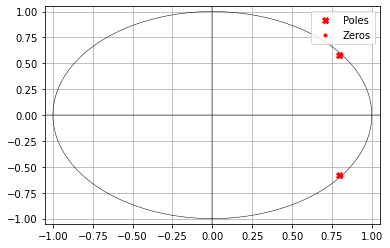

In [17]:
# YOUR CODE HERE

############ PLOTS ############
freq, h = signal.freqz(b, a, fs=fs)

# Plot
fig, ax = plt.subplots(4, 1, figsize=(8, 6))

# Frequency response
freq, h = signal.freqz(b, a, fs=fs)

# magnitude plot
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Magitude")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
#ax[0].set_xlim([0, 100])
ax[0].set_ylim([-25, 10])
ax[0].grid()

# phase response
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
#ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()

# impulse response
#butter = signal.dlti(*signal.butter(3, 0.5))
t, y = signal.dimpulse(notch_filter)
ax[2].step(t, np.squeeze(y), color='red')
ax[2].grid()
ax[2].set_xlabel('n [samples]')
ax[2].set_ylabel('Amplitude')

# step response
#butter = signal.dlti(*signal.butter(3, 0.5))
t, y = signal.dstep(notch_filter)
ax[3].step(t, np.squeeze(y), color='orange')
ax[3].grid()
ax[3].set_xlabel('n [samples]')
ax[3].set_ylabel('Amplitude')

# p/z plot
fig = plt.figure()
ax2 = fig.add_subplot(111)
pzmap(notch_filter, ax2, 'r')

# Plot
plt.show()


Evaluate the notch filter using both bode plot and pole zero map.

- Name the characteristics of the notch filter in both plot styles.
- Name the differences between a notch filter and a band-stop filter.
- How does the quality factor influence the notch filter in both bode plot and pole zero map?
- Name the effects of the poles converging towards the zeros of the transfer function. What happens if the poles are equal to the zeros?

YOUR ANSWER HERE

## Lab Experiment 2: Random glitches

Generate random glitches within an arbitrary audio file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Analyze the noise characteristic of the modified audio file in time and frequency domain

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Why are FIR and IIR filters not suitable for this kind of noise?

YOUR ANSWER HERE

Use a moving average/median filter on the file and display the result in time and frequency domain.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()